# 이용객 로그 데이터를 활용한 특정일의 시간대별 이용객 변화량 시각화

## 데이터 로딩후 RDD 생성
- tripdata : 2020년 3월 1일 우버 이용객 데이터
- 대용량 데이터인 관계로 17시 이전 데이터만 저장되어 있음

In [4]:
lines = sc.textFile('/rdd/trip_tmp.csv')

/rdd/trip_tmp.csv MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0

2

## 필요한 부분만 추출하기

',dispatching_base_num,request_datetime,driver_pay'

PythonRDD[5] at RDD at PythonRDD.scala:53

['0,B02510,2020-03-01 0:00,19.65',
 '1,B02510,2020-03-01 0:22,9.37',
 '2,B02764,2020-02-29 23:57,16.24',
 '3,B02764,2020-03-01 0:04,21.76',
 '4,B02764,2020-03-01 0:42,19.64',
 '5,B02682,2020-03-01 0:13,35.85',
 '6,B02764,2020-02-29 23:54,31.39',
 '7,B02764,2020-03-01 0:38,5.39',
 '8,B02764,2020-03-01 0:45,10.29',
 '9,B02764,2020-03-01 0:13,5.39',
 '10,B02764,2020-03-01 0:26,8.98',
 '11,B02764,2020-03-01 0:39,13.38',
 '12,B02765,2020-03-01 0:06,9.29',
 '13,B02765,2020-03-01 0:21,11.14',
 '14,B02765,2020-03-01 0:38,5.39',
 '15,B02765,2020-03-01 0:52,5.42',
 '16,B02764,2020-03-01 0:52,7.14',
 '17,B02764,2020-03-01 0:06,8.3',
 '18,B02764,2020-03-01 0:23,36',
 '19,B02510,2020-03-01 0:23,0',
 '20,B02864,2020-03-01 0:29,12.55',
 '21,B02864,2020-03-01 0:46,12.32',
 '22,B02510,2020-03-01 0:07,7.53',
 '23,B02510,2020-03-01 0:18,0',
 '24,B02510,2020-03-01 0:18,0',
 '25,B02510,2020-03-01 0:23,0',
 '26,B02764,2020-03-01 0:02,7',
 '27,B02764,2020-03-01 0:13,13.98',
 '28,B02764,2020-03-01 0:34,23.29'


```python
def f(row):
    return row != header
lines.filter(f) 
```

*데이터*
```
HV0005,B02510,2020-03-01 00:03:40,2020-03-01 00:23:39,81,159,
HV0005,B02510,2020-03-01 00:28:05,2020-03-01 00:38:57,168,119,
HV0003,B02764,2020-03-01 00:03:07,2020-03-01 00:15:04,137,209,1
HV0003,B02764,2020-03-01 00:18:42,2020-03-01 00:38:42,209,80,
HV0003,B02764,2020-03-01 00:44:24,2020-03-01 00:58:44,256,226,
...
```

['2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-02-29',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-01',
 '2020-03-

**map()**함수로 우리가 원하는 부분만 추출 할 수 있다


추출하는 함수
```python
lambda x: x.split(",")[2].split(" ")[0]

```
아래와 같다

```python]
def f(x):
    return x.split(",")[2].split(" ")[0]
```


오리지널 데이터
```
HV0005,B02510,2020-03-01 00:03:40,2020-03-01 00:23:39,81,159,
```

x.split(",")
```
[HV0005,B02510,2020-03-01 00:03:40,2020-03-01 00:23:39,81,159,]
```


x.split(",")[2]
```
[2020-03-01 00:03:40]
```


x.split(",")[2].split(" ")
```
[2020-03-01,00:03:40]
```

x.split(",")[2].split(" ")[0]
```
2020-03-01
```

## CountByValue

값이 얼마나 등장하는지 세준다 

예)
```
2020-03-01
2020-03-01
2020-03-01
2020-03-02
2020-03-02
2020-03-03
```
countByValue()
```
(2020-03-01,3)
(2020-03-02,2)
(2020-03-03,1)
```


**result는 이제 더이상 RDD가 아닌 Python 객체**

defaultdict(int,
            {'2020-03-01': 780219, '2020-02-29': 5603, '2020-03-02': 262753})

In [20]:
# 아래는 Spark코드가 아닌 일반적인 파이썬 코드
# CSV로 결과값 저장 
import pandas as pd


<Axes: >

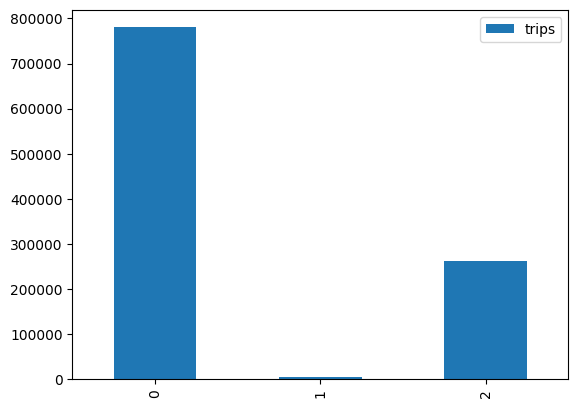

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline  


,Unnamed: 0,trips
0,2020-03-01,780219
1,2020-02-29,5603
2,2020-03-02,262753


### 시간대별 여행자 count

PythonRDD[10] at RDD at PythonRDD.scala:53

['0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '23',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '23',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

defaultdict(int,
            {'0': 67234,
             '23': 29809,
             '16': 40599,
             '1': 49807,
             '2': 36315,
             '3': 28311,
             '4': 23972,
             '5': 25142,
             '6': 37490,
             '7': 55134,
             '8': 65410,
             '9': 63140,
             '10': 63445,
             '11': 63164,
             '12': 47753,
             '13': 39308,
             '14': 40458,
             '15': 40546,
             '17': 41784,
             '18': 43987,
             '19': 41279,
             '20': 37956,
             '21': 35217,
             '22': 31315})

0     67234
1     49807
2     36315
3     28311
4     23972
5     25142
6     37490
7     55134
8     65410
9     63140
10    63445
11    63164
12    47753
13    39308
14    40458
15    40546
16    40599
17    41784
18    43987
19    41279
20    37956
21    35217
22    31315
23    29809
dtype: int64

In [42]:
from matplotlib import pyplot as plt

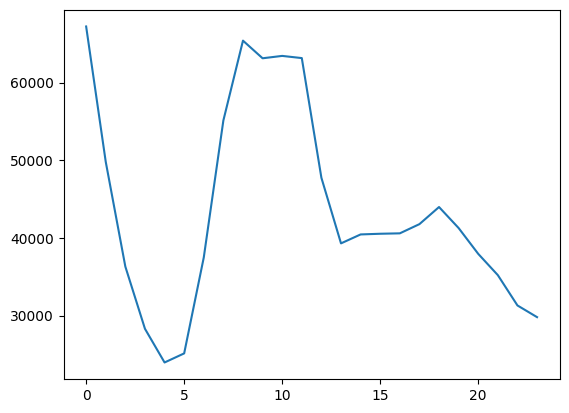